<style>
@import url(https://www.numfys.net/static/css/nbstyle.css);
</style>
<a href="https://www.numfys.net"><img class="logo" /></a>

# Lagrange Points

### Examples - Astrophysics
<section class="post-meta">
By Magnus H-S Dahle, Henning G. Hugdal, Håkon W. Ånes and Peter Berg
</section>
Last edited: March 22nd 2018 
___

## Introduction and Problem Formulation

Within this example, we are to consider a three body system subject to gravitational forces only, e.g. the Sun, the Earth and some Satellite (or particle), modeled as <i>point</i> masses $m_s$,  $m_e$ and $m$, respectively. The system is to be treated in the two-dimensional $x,y$-plane, with origin placed at the center of masses (CoM) reference frame as illustrated by the following problem sketch. Furthermore, we also assume that the Earth's orbit around the sun is a closed <i>circle</i> (with a constant distance to the Sun), and constant angular velocity $\omega$.

![Lagrange](images/1m_lagrange_points_tikz.png)

We want to study how the third mass, the satellite, behaves in the effective gravitational potential resulting from two opposing masses by deriving and solving its equations of motion. Moreover, we assume

$$ m \ll m_e \ll m_s$$

such that the CoM can be approximated to lie somewhere on the straight line between $m_s$ and $m_e$ as also indicated by the sketch. This, we define as the $x$-axis. In the following, we'll derive the satellite's equations of motion, and show the existance of Lagrange-Points (LPs) for which the gradient of the gravitational potential is zero. Then, we'll solve the equations of motion (EoM) numerically using the [4th order Runge-Kutta method](https://www.numfys.net/search/?q=4th%20order%20runge-kutta) with initial position close to an LP.

## Equations of Motion

We assume that only gravitational forces are acting on the satellite, given by Newton's mechanical law for gravitation, which combined with Newton's second law of motion gives the general vector form of the satellite's EoM,

$$
\begin{equation}
    \vec{F} = -G\frac{m_s m}{r_s^2}\hat{r}_s - G\frac{m_e m}{r_e^2}\hat{r}_e = m\vec{a}.
\end{equation}
$$

Introduced here are $G$, the gravitational constant, $\vec{a}$, the satellite's acceleration, and $\vec{r}_s=r_s\hat{r}_s$ and $\vec{r}_e=r_e\hat{r}_e$ which are the vectors pointing from the satellite to the Sun and the Earth, respectively. 

One has to treat $\vec{a}$ with care, since we will treat the problem in a <i>rotating coordinate system</i>, moving with the earth around the sun. In this system the Sun and Earth will be at rest relative to each other. Hence we want to express the acceleration in the rotating frame, which means that the time-derivative has to be expressed in the rotating frame. To do this, we use an operator identity relating the time-derivative in the static and rotating reference frames,

$$
\left( \frac{\textrm{d}}{\textrm{d}t} \right)_{\text{static}} = \left( \frac{\textrm{d}}{\textrm{d}t} \right)_{\text{rotated}} + \vec{\omega}\, \times,
$$

where $\vec{\omega} = \omega \hat{n}$ denotes the angular velocity of the rotating system. We can then express the satellite's acceleration by

$$
\begin{equation}
\vec{a} = \left(\frac{\textrm{d}^2 \vec{r}}{\textrm{d} t^2}\right) + 2\omega\hat{z} \times \left(\frac{\textrm{d} \vec{r}}{\textrm{d} t}\right) + \omega \hat{z} \times (\omega \hat{z} \times \vec{r}),
\end{equation}
$$

where the time-derivatives are now with respect to the rotating frame. This can be inserted into the EoM above to yield an EoM in the rotating reference frame:

$$m\left[\left(\frac{\textrm{d}^2 \vec{r}}{\textrm{d} t^2}\right) + 2\omega\hat{z} \times \left(\frac{\textrm{d} \vec{r}}{\textrm{d} t}\right) + \omega \hat{z} \times (\omega \hat{z} \times \vec{r})\right] = -G\frac{m_s m}{r_s^2}\hat{r}_s - G\frac{m_e m}{r_e^2}\hat{r}_e.$$

As the above equation of motion is a single vector equation, it can be decomposed in into two scalar equations separately treating the $y$ and $x$ directions,

\begin{align}
    \hat{x} \cdot \left[ \left(\frac{\textrm{d}^2 \vec{r}}{\textrm{d} t^2}\right) + 2\omega\hat{z} \times \left(\frac{\textrm{d} \vec{r}}{\textrm{d} t}\right) + \omega \hat{z} \times (\omega \hat{z} \times \vec{r})\right] &= - \frac{G m_s}{r_s^2}\hat{r}_{s}\cdot\hat{x} -  \frac{G m_e}{r_e^2}\hat{r}_{e}\cdot\hat{x},\\
    \hat{y} \cdot \left[ \left(\frac{\textrm{d}^2 \vec{r}}{\textrm{d} t^2}\right) + 2\omega\hat{z} \times \left(\frac{\textrm{d} \vec{r}}{\textrm{d} t}\right) + \omega \hat{z} \times (\omega \hat{z} \times \vec{r}) \right] &= - \frac{G m_s}{r_s^2}\hat{r}_{s}\cdot\hat{y} -  \frac{G m_e}{r_e^2}\hat{r}_{e}\cdot\hat{y}.
\end{align}

__Choice of Units__

We will now make two choices regarding the units used. First of all, we define

$$\mu \equiv G(m_s + m_e) = \mu_s + \mu_e = 1.$$

Then, we choose a length scale such that the separation between the Earth and Sun is 1, i.e.

$$\left|\vec{r}_e + \vec{r}_s\right| = 1.$$

From the definition of CoM-coordinates we get

$$\vec{R}_{CoM} = \frac{m_s\vec{r_s} + m_e\vec{r_e}}{m_s+m_e},$$

where we have neglected the small mass $m$. Choosing the CoM to be placed in the origin of our coordinate system, and the Sun and Earth to be located along the $x$-axis in the rotating frame, we get

$$0 = m_e x_e + m_s x_s = m_e \left|x_e\right| - m_s \left|x_s\right|.$$

Multiplying with $G$ and rearranging we get

$$\mu_e \left|x_e\right| = \mu_s \left|x_s\right|.$$

We can now use the choice of units above to express $\left|x_e\right|$ and $\left|x_s\right|$ in terms of $\mu_s$ and $\mu_e$.

$$
\begin{align}
\mu_e \left|x_e\right| &= \mu_s (1-\left|x_e\right|) \,\Rightarrow\, \left|x_e\right| = \mu_s,\\
\mu_s \left|x_s\right| &= \mu_e (1-\left|x_s\right|) \,\Rightarrow\, \left|x_s\right| = \mu_e,
\end{align}
$$

where we have used $\left|x_e\right| + \left|x_s\right| = 1$. This allows us to express the distances from the Earth and Sun to the mass $m$ at $\vec{r} = (x,y)$ as

$$\begin{align}
r_e = \sqrt{(x-\mu_s)^2+y^2},\\
r_s = \sqrt{(x+\mu_e)^2+y^2}.
\end{align}$$

Lastly, we also choose $\omega=1$, which means that we now have dimensionless equations of motion.

To simplify writing, we now introduce the dot-notation to denote time derivatives, i.e. $\dot{x}\equiv \frac{\textrm{d}x}{\textrm{d}t}$ and $\dot{y}\equiv \frac{\textrm{d}y}{\textrm{d}t}$ such that the above equations of motion can be rewritten as the much neater


$$
\begin{align}
    \ddot{x} - 2\omega\dot{y} &= -\frac{\partial V}{\partial x},\\
    \ddot{y} + 2\omega\dot{x} &= -\frac{\partial V}{\partial y},
\end{align}
$$
with
$$
\begin{equation}
    V(x,y) \equiv -\frac{1}{2} \omega^2(x^2+y^2)-\frac{\mu_s}{r_s}-\frac{\mu_e}{r_e}.
\end{equation}
$$

These are the equations of motion in the rotating reference frame, governing the behavior of the satellite moving in the combined gravitational fields of the Earth and the Sun.

## Lagrange Points

One quickly realizes that the effective potential $V$ is highly non-linear, and that there exists a possibility that it may contain (both stable and unstable) equilibrium points where the potential gradient is zero,

$$
\nabla V = 0 \quad\Longrightarrow\quad \ddot{x} - 2\omega\dot{y} = \ddot{y} + 2\omega\dot{x} = 0.
$$

For a three body system under the assumption $m \ll m_e \ll m_s$ made above, there exists five such points, which are named after the Italian mathematician Joseph-Louis Lagrange. Here, we only present the result, but would like to encourage you to compute them yourself. It should be noted that it is not possible to find closed-form solutions to the first three Lagrange points; the first three equations are valid for $\mu_e \ll 1$.

$$
\begin{align}
    \textrm{L1: }& \left(1-\left(\frac{\mu_s}{3}\right)^{1/3},0\right),\\
    \textrm{L2: }& \left(1+\left(\frac{\mu_s}{3}\right)^{1/3},0\right),\\
    \textrm{L3: }& \left(-1-\frac{5\mu_s}{12},0\right),\\
    \textrm{L4: }& \left(\frac{1}{2}(\mu_s-\mu_e),\frac{\sqrt{3}}{2}\right),\\
    \textrm{L5: }& \left(\frac{1}{2}(\mu_s-\mu_e),-\frac{\sqrt{3}}{2}\right),
\end{align}
$$

These coordinates are subject to the unit-system we have chosen. The first three of these are unstable, while L4 and L5 are stable. Below, we make a graphical plot of the potential and the resulting LPs.

In [2]:
# WE FIRST DEFINE PROPERTIES AND SETTINGS FOR ALL PLOTS

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc


# Set common figure parameters:
newparams = {'figure.figsize': (10, 4),
             'lines.linewidth': 1.5, 'lines.markersize': 10,
             'font.size': 14}
plt.rcParams.update(newparams)

Then, let us plot equipotential lines of the potential together with the Sun and Earth, and the five Lagrange points. We encourge you to change the mass-relation between the Earth and Sun (that is $\mu_e,\mu_s$) to see how this changes the effective potential and the positions of the LPs.

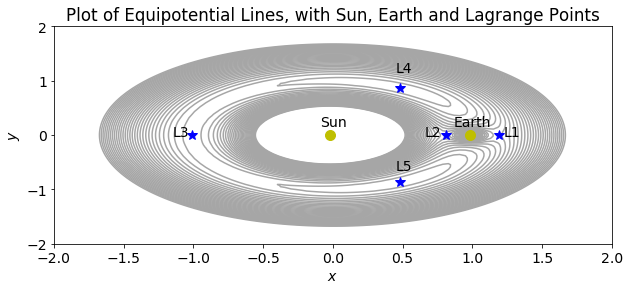

In [3]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X,Y = np.meshgrid(x,y)

w = 1        # Angular frequency (AF) of Earth around the Sun
             # and thus also the AF of the rotating coord. sys.

# TRUE Picure:
# mu_s = 1.0/(1.0 + 3.0e-6) # True mass relation of the Sun and Earth
# mu_e = 1.0 - mu_s         # m_e/m_s ~= 3.0*10^-6

# QUALITATIVE Picure:
mu_s = 0.98
mu_e = 1.0 - mu_s

def plot_Pot():

    # Potential:
    V = 1/2*w**2*(X**2+Y**2) + mu_s/np.sqrt((X+mu_e)**2+Y**2) + mu_e/np.sqrt((X-mu_s)**2+Y**2)

    # Potential levels and contour plot
    lvl = np.linspace(1.5, 2.0, 31)
    plt.contour(X, Y, V, lvl, colors='0.65')

    # Plot Sun and Earth
    plt.plot(mu_s, 0, 'yo', -mu_e, 0, 'yo')
    plt.figtext(0.495, 0.535, "Sun")
    plt.figtext(0.68, 0.535, "Earth")

plt.figure()
plot_Pot()
# Plot Lagrange points
plt.plot(1-(mu_e/3)**(1/3), 0, 'b*')
plt.figtext(0.75, 0.5, "L1")
plt.plot(1+(mu_e/3)**(1/3), 0, 'b*')
plt.figtext(0.64, 0.5, "L2")
plt.plot(-(1+5/12*mu_e), 0, 'b*')
plt.figtext(0.29, 0.5, "L3")
plt.plot(0.5*(mu_s-mu_e), np.sqrt(3)/2, 'b*')
plt.figtext(0.6, 0.72, "L4")
plt.plot(0.5*(mu_s-mu_e), -np.sqrt(3)/2, 'b*')
plt.figtext(0.6, 0.38, "L5")

# add the 'r' before text strings to enable TeX rendering.
plt.title("Plot of Equipotential Lines, with Sun, Earth and Lagrange Points")
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');
plt.show()

## Numerical Solution to the EoM (4th order Runge-Kutta)

To calculate the resulting trajectory of the small mass initially placed in an LP, we will apply the fourth order Runge-Kutta method. To accomplish this, we'll need to rewrite the two second order ODEs to a set of four first order ODEs. Considering,

$$
\begin{align}
    \ddot{x} - 2\omega\dot{y} &= -\frac{\partial V}{\partial x},\\
    \ddot{y} + 2\omega\dot{x} &= -\frac{\partial V}{\partial y}
\end{align}
$$
with
$$
\begin{align}
    \frac{\partial}{\partial x}V(x,y) &= +2\omega v + \omega x + \frac{\mu_s[x+\mu_e]}{r_s^3} + \frac{\mu_e[x-\mu_s]}{r_e^3} \\[1.0em]
    \frac{\partial}{\partial y}V(x,y) &= -2\omega u + \omega y + \frac{\mu_s y}{r_s^3} + \frac{\mu_e y}{r_e^3} \\[1.0em]
    r_s &= \sqrt{(x+\mu_e)^2 + y^2}\\[1.0em]
    r_e &= \sqrt{(x-\mu_s)^2 + y^2}
\end{align}
$$

We then introduce two new variables $u\equiv \dot{x}$ and $v\equiv \dot{y}$ such that

$$
\begin{align}
    \dot{x} &= u &\equiv F(x,y,u,v,t)\\[1.0em]
    \dot{y} &= v &\equiv G(x,y,u,v,t)\\[1.0em]
    \dot{u} &= +2\omega v + \omega^2 x -\mu_s \frac{x+\mu_e}{r_s^3} -\mu_e \frac{x-\mu_s}{r_e^3} &\equiv H(x,y,u,v,t)\\[1.0em]
    \dot{v} &= -2\omega u + \omega^2 y -\mu_s \frac{y}{r_s^3} - \mu_e \frac{y}{r_e^3} &\equiv I(x,y,u,v,t)
\end{align}
$$

We then implement the [fourth order Runge-Kutta](https://www.numfys.net/search/?q=4th%20order%20runge-kutta).


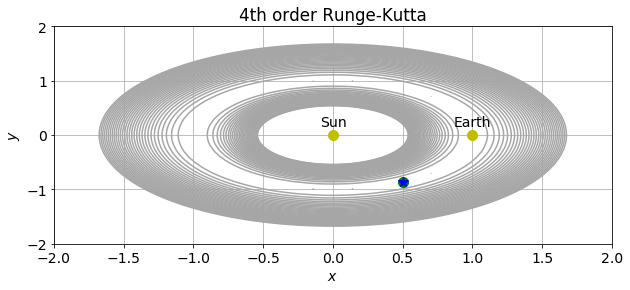

In [4]:
# Here, we haven't removed the x,y,u,v arguments of F,G,H,I even though they are independent 
# of most of them, mostly to keep the generality of implementation, with the exception of the
# time variable 't', which does not explicitly appear in any of the functions.

def F(X_, Y_, U_, V_):
    return U_

def G(X_, Y_, U_, V_):
    return V_

def H(X_, Y_, U_, V_):
    r_e = np.sqrt((X_-mu_s)**2+Y_**2)
    r_s = np.sqrt((X_+mu_e)**2+Y_**2)
    return +2*w*V_ + w**2*X_ - mu_s*(X_+mu_e)/r_s**3 - mu_e*(X_-mu_s)/r_e**3

def I(X_, Y_, U_, V_):
    r_e = np.sqrt((X_-mu_s)**2+Y_**2)
    r_s = np.sqrt((X_+mu_e)**2+Y_**2)
    return -2*w*U_ + w**2*Y_ - mu_s*Y_/r_s**3        - mu_e*Y_/r_e**3


# TRUE Picure:
mu_s = 1.0/(1.0 + 3.0e-6) # True mass relation of the Sun and Earth
mu_e = 1.0 - mu_s         # m_e/m_s ~= 3.0*10^-6

# QUALITATIVE Picure:
# mu_s = 0.98
# mu_e = 1.0 - mu_s


dt = 0.001          # Time Step Size
t_max = 15          # Total meassure time; t_max=2pi corresponds to 1 year
N = int(t_max/dt)   # Number of Time Steps in t_max

X_4RK = np.zeros(N) # Numerical solution, x(t)
Y_4RK = np.zeros(N) # Numerical solution, y(t)
U_4RK = np.zeros(N) # Numerical solution, u(t) = dx/dt
V_4RK = np.zeros(N) # Numerical solution, v(t) = dy/dt

# Initial Position
X_4RK[0] = 0.5*(mu_s-mu_e) + (0.5*(mu_s-mu_e))/100
Y_4RK[0] = -np.sqrt(3)/2

#Initial velcity
U_4RK[0] = +0.00
V_4RK[0] = -0.01


# PERFORM 4. ORDER RUNGE-KUTTA METHOD (see Module 4.4):
for n in range(N-1):
    
    k_x1 = dt * F( X_4RK[n], Y_4RK[n], U_4RK[n], V_4RK[n] )
    k_y1 = dt * G( X_4RK[n], Y_4RK[n], U_4RK[n], V_4RK[n] )
    k_u1 = dt * H( X_4RK[n], Y_4RK[n], U_4RK[n], V_4RK[n] )
    k_v1 = dt * I( X_4RK[n], Y_4RK[n], U_4RK[n], V_4RK[n] )
    
    k_x2 = dt * F( X_4RK[n] + k_x1/2, Y_4RK[n] + k_y1/2, U_4RK[n] + k_u1/2, V_4RK[n] + k_v1/2 )
    k_y2 = dt * G( X_4RK[n] + k_x1/2, Y_4RK[n] + k_y1/2, U_4RK[n] + k_u1/2, V_4RK[n] + k_v1/2 )
    k_u2 = dt * H( X_4RK[n] + k_x1/2, Y_4RK[n] + k_y1/2, U_4RK[n] + k_u1/2, V_4RK[n] + k_v1/2 )
    k_v2 = dt * I( X_4RK[n] + k_x1/2, Y_4RK[n] + k_y1/2, U_4RK[n] + k_u1/2, V_4RK[n] + k_v1/2 )
    
    k_x3 = dt * F( X_4RK[n] + k_x2/2, Y_4RK[n] + k_y2/2, U_4RK[n] + k_u2/2, V_4RK[n] + k_v2/2 )
    k_y3 = dt * G( X_4RK[n] + k_x2/2, Y_4RK[n] + k_y2/2, U_4RK[n] + k_u2/2, V_4RK[n] + k_v2/2 )
    k_u3 = dt * H( X_4RK[n] + k_x2/2, Y_4RK[n] + k_y2/2, U_4RK[n] + k_u2/2, V_4RK[n] + k_v2/2 )
    k_v3 = dt * I( X_4RK[n] + k_x2/2, Y_4RK[n] + k_y2/2, U_4RK[n] + k_u2/2, V_4RK[n] + k_v2/2 )
    
    k_x4 = dt * F( X_4RK[n] + k_x3, Y_4RK[n] + k_y3, U_4RK[n] + k_u3, V_4RK[n] + k_v3 )
    k_y4 = dt * G( X_4RK[n] + k_x3, Y_4RK[n] + k_y3, U_4RK[n] + k_u3, V_4RK[n] + k_v3 )
    k_u4 = dt * H( X_4RK[n] + k_x3, Y_4RK[n] + k_y3, U_4RK[n] + k_u3, V_4RK[n] + k_v3 )
    k_v4 = dt * I( X_4RK[n] + k_x3, Y_4RK[n] + k_y3, U_4RK[n] + k_u3, V_4RK[n] + k_v3 )
    
    X_4RK[n+1] = X_4RK[n] + k_x1/6 + k_x2/3 + k_x3/3 + k_x4/6
    Y_4RK[n+1] = Y_4RK[n] + k_y1/6 + k_y2/3 + k_y3/3 + k_y4/6
    U_4RK[n+1] = U_4RK[n] + k_u1/6 + k_u2/3 + k_u3/3 + k_u4/6
    V_4RK[n+1] = V_4RK[n] + k_v1/6 + k_v2/3 + k_v3/3 + k_v4/6
    
    

plt.figure()
plt.title('4th order Runge-Kutta')
plt.plot(X_4RK,Y_4RK, 'r')
plt.plot(X_4RK[0], Y_4RK[0], 'go')             # Start pos.
plt.plot(0.5*(mu_s-mu_e), -np.sqrt(3)/2, 'b*') # L5
plot_Pot()
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid();

From the plot above, we see that in the time frame of $t_{max}=15$, the satellite has not (yet) been able to escape its starting area. Below follows a closer-looking plot of the $x$- and $y$-coordinates of the satellite. In both the above, and following plots, the green dot indicates the satellite's starting position while the blue star gives the position of L5.

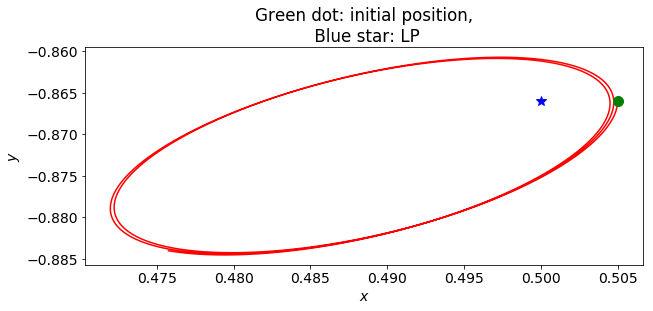

In [5]:
plt.figure()
plt.title('Green dot: initial position,\n Blue star: LP')
plt.plot(X_4RK, Y_4RK, 'r')
plt.plot(X_4RK[0], Y_4RK[0], 'go')             # Start pos.
plt.plot(0.5*(mu_s-mu_e), -np.sqrt(3)/2, 'b*') # L5
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

We see that the satellite is orbiting L5! Note that if we place the particle precisely at L5, with zero initial velocity ($u_0 = v_0 = 0$), then the satellite will stay immovable, at rest. Below we try to give the small mass a small initial velocity to see if we can achieve periodic orbits around L5, with a more correct approximation of the mass ratio between the Earth and the Sun, $m_e/m_s \approx 3.0\times10^{-6}$.

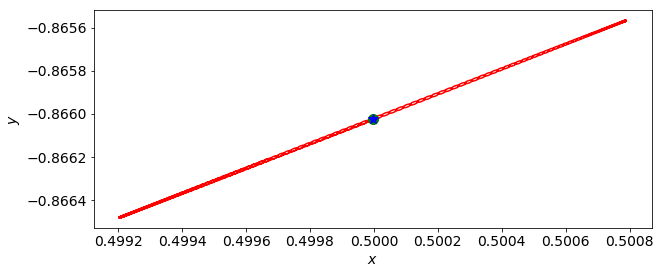

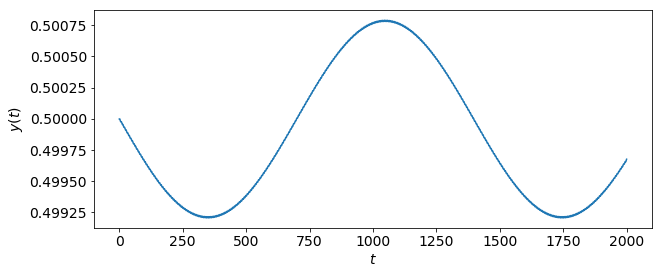

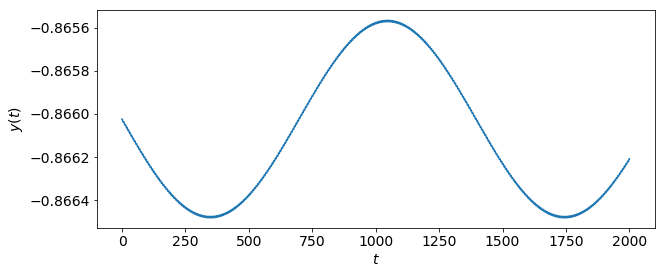

In [6]:
dt = 0.01
t_max = 2000
N = int(t_max/dt)

mu_s = 1.0/(1.0 + 3.0e-6) # Approximated mass relation of the Sun and Earth
mu_e = 1.0 - mu_s         # m_e/m_s ~= 3.0*10^-6

X_4RK = np.zeros(N)
Y_4RK = np.zeros(N)
U_4RK = np.zeros(N)
V_4RK = np.zeros(N)

# Initial Position
X_4RK[0] = 0.5*(mu_s-mu_e)
Y_4RK[0] = -np.sqrt(3)/2

#Initial velcity
U_4RK[0] = 0.000001
V_4RK[0] = 0.000001


for n in range(N-1):
    
    k_x1 = dt * F( X_4RK[n], Y_4RK[n], U_4RK[n], V_4RK[n] )
    k_y1 = dt * G( X_4RK[n], Y_4RK[n], U_4RK[n], V_4RK[n] )
    k_u1 = dt * H( X_4RK[n], Y_4RK[n], U_4RK[n], V_4RK[n] )
    k_v1 = dt * I( X_4RK[n], Y_4RK[n], U_4RK[n], V_4RK[n] )
    
    k_x2 = dt * F( X_4RK[n] + k_x1/2, Y_4RK[n] + k_y1/2, U_4RK[n] + k_u1/2, V_4RK[n] + k_v1/2 )
    k_y2 = dt * G( X_4RK[n] + k_x1/2, Y_4RK[n] + k_y1/2, U_4RK[n] + k_u1/2, V_4RK[n] + k_v1/2 )
    k_u2 = dt * H( X_4RK[n] + k_x1/2, Y_4RK[n] + k_y1/2, U_4RK[n] + k_u1/2, V_4RK[n] + k_v1/2 )
    k_v2 = dt * I( X_4RK[n] + k_x1/2, Y_4RK[n] + k_y1/2, U_4RK[n] + k_u1/2, V_4RK[n] + k_v1/2 )
    
    k_x3 = dt * F( X_4RK[n] + k_x2/2, Y_4RK[n] + k_y2/2, U_4RK[n] + k_u2/2, V_4RK[n] + k_v2/2 )
    k_y3 = dt * G( X_4RK[n] + k_x2/2, Y_4RK[n] + k_y2/2, U_4RK[n] + k_u2/2, V_4RK[n] + k_v2/2 )
    k_u3 = dt * H( X_4RK[n] + k_x2/2, Y_4RK[n] + k_y2/2, U_4RK[n] + k_u2/2, V_4RK[n] + k_v2/2 )
    k_v3 = dt * I( X_4RK[n] + k_x2/2, Y_4RK[n] + k_y2/2, U_4RK[n] + k_u2/2, V_4RK[n] + k_v2/2 )
    
    k_x4 = dt * F( X_4RK[n] + k_x3, Y_4RK[n] + k_y3, U_4RK[n] + k_u3, V_4RK[n] + k_v3 )
    k_y4 = dt * G( X_4RK[n] + k_x3, Y_4RK[n] + k_y3, U_4RK[n] + k_u3, V_4RK[n] + k_v3 )
    k_u4 = dt * H( X_4RK[n] + k_x3, Y_4RK[n] + k_y3, U_4RK[n] + k_u3, V_4RK[n] + k_v3 )
    k_v4 = dt * I( X_4RK[n] + k_x3, Y_4RK[n] + k_y3, U_4RK[n] + k_u3, V_4RK[n] + k_v3 )
    
    X_4RK[n+1] = X_4RK[n] + k_x1/6 + k_x2/3 + k_x3/3 + k_x4/6
    Y_4RK[n+1] = Y_4RK[n] + k_y1/6 + k_y2/3 + k_y3/3 + k_y4/6
    U_4RK[n+1] = U_4RK[n] + k_u1/6 + k_u2/3 + k_u3/3 + k_u4/6
    V_4RK[n+1] = V_4RK[n] + k_v1/6 + k_v2/3 + k_v3/3 + k_v4/6
    
plt.figure()
plt.plot(X_4RK, Y_4RK, 'r')
plt.plot(X_4RK[0], Y_4RK[0], 'go')             # Start pos.
plt.plot(0.5*(mu_s-mu_e), -np.sqrt(3)/2, 'b*') # L5
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.figure()
plt.plot(np.linspace(0, t_max, N), X_4RK)
plt.xlabel(r'$t$')
plt.ylabel(r'$y(t)$');

plt.figure()
plt.plot(np.linspace(0, t_max, N), Y_4RK)
plt.xlabel(r'$t$')
plt.ylabel(r'$y(t)$');

We see from the plots of $x(t)$ and $y(t)$ that we have periodic orbits, and the satellite stays in the vicinity of L5 for large $t_{max}$.